# Brain Tumor Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
from pathlib import Path

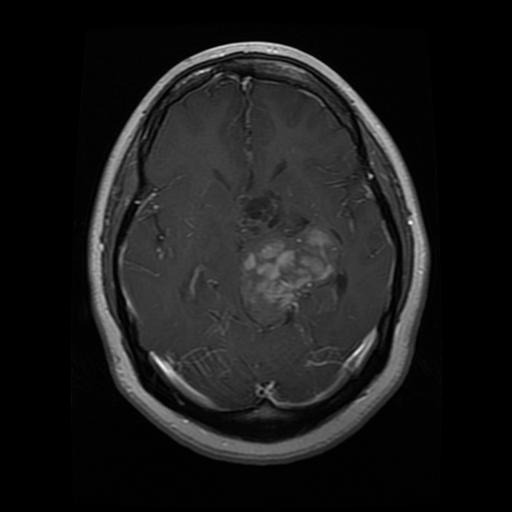

In [5]:
path = Path().cwd().parent / 'data' / 'Training' / 'glioma_tumor'
name = 'gg (1).jpg'
fullname = path / name
load_img(fullname)

In [6]:
img = load_img(fullname)
x = np.array(img)
x.shape

(512, 512, 3)

## Transfer Learning

In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    Path().cwd().parent / 'data' / 'Training',
    target_size=(256, 256),
    batch_size=32
)

Found 2871 images belonging to 4 classes.


In [9]:
train_ds.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [10]:
X, y = next(train_ds)

In [11]:
X.shape

(32, 256, 256, 3)

In [12]:
y[:10]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [13]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds = test_gen.flow_from_directory(
    Path().cwd().parent / 'data' / 'Testing',
    target_size=(256, 256),
    batch_size=32,
    shuffle=False
)

Found 394 images belonging to 4 classes.


In [14]:
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
)

base_model.trainable = False

In [15]:
inputs = keras.Input(shape=(256, 256, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(4)(vectors)
model = keras.Model(inputs, outputs)

In [16]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [19]:
history = model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
90/90 [==============================] - 89s 950ms/step - loss: 1.2884 - accuracy: 0.6659 - val_loss: 1.1165 - val_accuracy: 0.6396
Epoch 2/20
90/90 [==============================] - 84s 929ms/step - loss: 0.4261 - accuracy: 0.8418 - val_loss: 1.5968 - val_accuracy: 0.6574
Epoch 3/20
90/90 [==============================] - 84s 930ms/step - loss: 0.3296 - accuracy: 0.8700 - val_loss: 1.1611 - val_accuracy: 0.7157
Epoch 4/20
90/90 [==============================] - 84s 934ms/step - loss: 0.3579 - accuracy: 0.8666 - val_loss: 1.4548 - val_accuracy: 0.6624
Epoch 5/20
90/90 [==============================] - 84s 933ms/step - loss: 0.2600 - accuracy: 0.9017 - val_loss: 1.3185 - val_accuracy: 0.6929
Epoch 6/20
90/90 [==============================] - 84s 932ms/step - loss: 0.1614 - accuracy: 0.9394 - val_loss: 1.2356 - val_accuracy: 0.7817
Epoch 7/20
90/90 [==============================] - 83s 928ms/step - loss: 0.1693 - accuracy: 0.9359 - val_loss: 1.0686 - val_accuracy: 0.8046

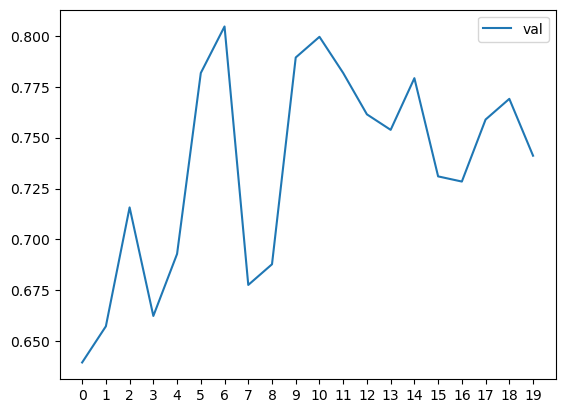

In [20]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(20))
plt.legend()

## Adjusting the learning rate

In [21]:
def make_model(learning_rate=0.01):
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(256, 256, 3)
    )

    base_model.trainable = False
    
    #########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(4)(vectors)
    model = keras.Model(inputs, outputs)
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [22]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(
        train_ds,
        epochs=20,
        validation_data=test_ds
    )
    scores[lr] = history.history
    
    print('\n\n')

0.0001
Epoch 1/20
90/90 [==============================] - 88s 942ms/step - loss: 1.2453 - accuracy: 0.4209 - val_loss: 1.3452 - val_accuracy: 0.3756
Epoch 2/20
90/90 [==============================] - 83s 926ms/step - loss: 0.9942 - accuracy: 0.6174 - val_loss: 1.2214 - val_accuracy: 0.4670
Epoch 3/20
90/90 [==============================] - 83s 926ms/step - loss: 0.8515 - accuracy: 0.6906 - val_loss: 1.1519 - val_accuracy: 0.5152
Epoch 4/20
90/90 [==============================] - 83s 926ms/step - loss: 0.7624 - accuracy: 0.7366 - val_loss: 1.1137 - val_accuracy: 0.5254
Epoch 5/20
90/90 [==============================] - 83s 926ms/step - loss: 0.6999 - accuracy: 0.7540 - val_loss: 1.1018 - val_accuracy: 0.5355
Epoch 6/20
90/90 [==============================] - 83s 926ms/step - loss: 0.6531 - accuracy: 0.7711 - val_loss: 1.0775 - val_accuracy: 0.5558
Epoch 7/20
90/90 [==============================] - 83s 924ms/step - loss: 0.6168 - accuracy: 0.7895 - val_loss: 1.0699 - val_accuracy:

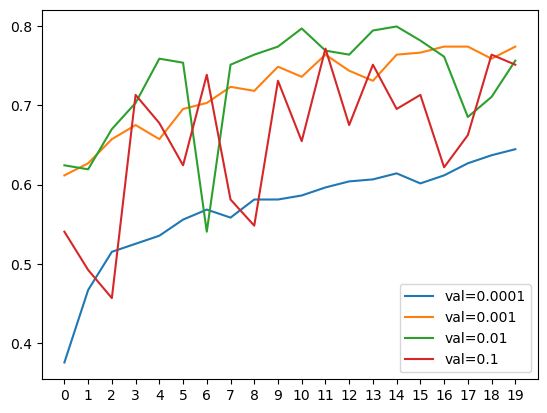

In [23]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=f'val={lr}')
plt.xticks(np.arange(20))
plt.legend()

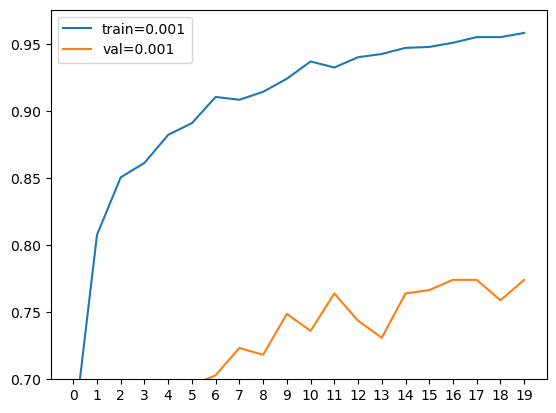

In [27]:
plt.plot(scores[0.001]['accuracy'], label='train=0.001')
plt.plot(scores[0.001]['val_accuracy'], label='val=0.001')
plt.xticks(np.arange(20))
plt.ylim(0.7)
plt.legend()

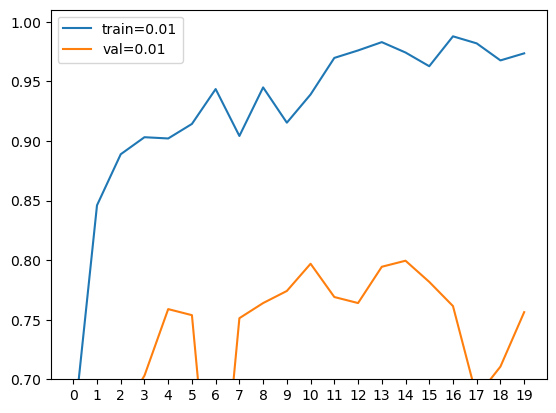

In [26]:
plt.plot(scores[0.01]['accuracy'], label='train=0.01')
plt.plot(scores[0.01]['val_accuracy'], label='val=0.01')
plt.xticks(np.arange(20))
plt.ylim(0.7)
plt.legend()

## Adding more layers

In [29]:
def make_model(learning_rate=0.01, inner_size=128):
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(256, 256, 3)
    )

    base_model.trainable = False
    
    #########################################
    inputs = keras.Input(shape=(256, 256, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    outputs = keras.layers.Dense(4)(inner)
    model = keras.Model(inputs, outputs)
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [30]:
learning_rate = 0.01

scores = {}

for size in [128, 256, 512, 1024]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, inner_size=size)
    history = model.fit(train_ds, epochs=20, validation_data=test_ds)
    scores[size] = history.history
    
    print('\n\n')

128
Epoch 1/20
90/90 [==============================] - 89s 952ms/step - loss: 1.9095 - accuracy: 0.6279 - val_loss: 1.1005 - val_accuracy: 0.5990
Epoch 2/20
90/90 [==============================] - 82s 914ms/step - loss: 0.4497 - accuracy: 0.8275 - val_loss: 1.1807 - val_accuracy: 0.6218
Epoch 3/20
90/90 [==============================] - 82s 911ms/step - loss: 0.3485 - accuracy: 0.8690 - val_loss: 0.8988 - val_accuracy: 0.7183
Epoch 4/20
90/90 [==============================] - 82s 912ms/step - loss: 0.2934 - accuracy: 0.8895 - val_loss: 1.1475 - val_accuracy: 0.7132
Epoch 5/20
90/90 [==============================] - 82s 916ms/step - loss: 0.2495 - accuracy: 0.9038 - val_loss: 1.2063 - val_accuracy: 0.7208
Epoch 6/20
90/90 [==============================] - 82s 915ms/step - loss: 0.2050 - accuracy: 0.9178 - val_loss: 1.0393 - val_accuracy: 0.6904
Epoch 7/20
90/90 [==============================] - 84s 933ms/step - loss: 0.2105 - accuracy: 0.9230 - val_loss: 1.1087 - val_accuracy: 0.

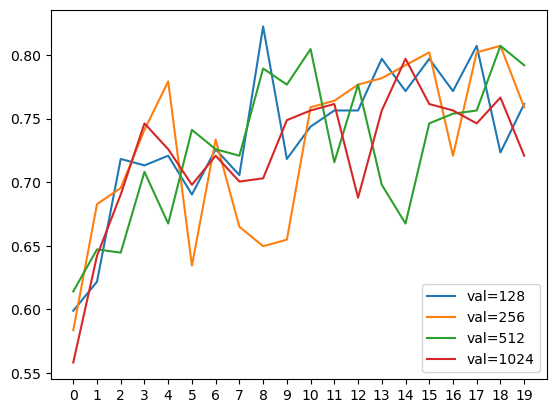

In [31]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=f'val={size}')
plt.xticks(np.arange(20))
plt.legend()

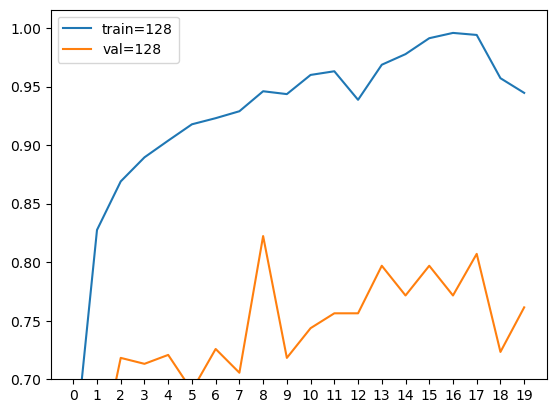

In [37]:
plt.plot(scores[128]['accuracy'], label='train=128')
plt.plot(scores[128]['val_accuracy'], label='val=128')
plt.xticks(np.arange(20))
plt.ylim(0.7)
plt.legend()

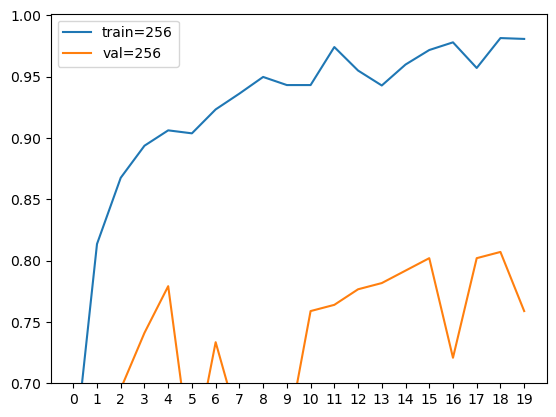

In [38]:
plt.plot(scores[256]['accuracy'], label='train=256')
plt.plot(scores[256]['val_accuracy'], label='val=256')
plt.xticks(np.arange(20))
plt.ylim(0.70)
plt.legend()

## Regularization: Dropout

In [40]:
def make_model(learning_rate=0.01, inner_size=128, droprate=0.5):
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(256, 256, 3)
    )

    base_model.trainable = False
    
    #########################################
    inputs = keras.Input(shape=(256, 256, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(4)(drop)
    model = keras.Model(inputs, outputs)
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [41]:
learning_rate = 0.01
size = 128

scores = {}

for droprate in [0.2, 0.5]:
    print(droprate)
    
    model = make_model(learning_rate=learning_rate, inner_size=size, droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=test_ds)
    scores[droprate] = history.history
    
    print('\n\n')

0.2
Epoch 1/30
90/90 [==============================] - 99s 1s/step - loss: 2.0016 - accuracy: 0.6136 - val_loss: 1.0748 - val_accuracy: 0.5838
Epoch 2/30
90/90 [==============================] - 94s 1s/step - loss: 0.5664 - accuracy: 0.7787 - val_loss: 0.9635 - val_accuracy: 0.6701
Epoch 3/30
90/90 [==============================] - 93s 1s/step - loss: 0.4957 - accuracy: 0.8066 - val_loss: 0.9463 - val_accuracy: 0.6497
Epoch 4/30
90/90 [==============================] - 93s 1s/step - loss: 0.4609 - accuracy: 0.8157 - val_loss: 1.1300 - val_accuracy: 0.6244
Epoch 5/30
90/90 [==============================] - 93s 1s/step - loss: 0.3734 - accuracy: 0.8523 - val_loss: 1.0789 - val_accuracy: 0.6980
Epoch 6/30
90/90 [==============================] - 94s 1s/step - loss: 0.3488 - accuracy: 0.8641 - val_loss: 1.0429 - val_accuracy: 0.7310
Epoch 7/30
90/90 [==============================] - 94s 1s/step - loss: 0.3640 - accuracy: 0.8613 - val_loss: 0.9910 - val_accuracy: 0.7183
Epoch 8/30
90/90

Dropout has not increased the effeciency of the model.

## Data Augmentation

Data augmentation has not shown the improvement of the model accuracy.

In [42]:
# train_gen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     brightness_range=[0.8, 1.2],
#     zoom_range=[0.8, 1.2],
#     channel_shift_range=20,
#     horizontal_flip=True,
#     vertical_flip=True
# )

# train_ds = train_gen.flow_from_directory(
#     Path().cwd().parent / 'data' / 'Training',
#     target_size=(150, 150),
#     batch_size=32
# )

# test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# test_ds = train_gen.flow_from_directory(
#     Path().cwd().parent / 'data' / 'Testing',
#     target_size=(150, 150),
#     batch_size=32,
#     shuffle=False
# )

In [43]:
# learning_rate = 0.001
# size = 100
# droprate = 0.0

# model = make_model(learning_rate=learning_rate, inner_size=size, droprate=droprate)
# history = model.fit(train_ds, epochs=20, validation_data=test_ds)

## Saving the best model with checkpointing

In [44]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'inception_v3_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [45]:
learning_rate = 0.01
size = 128
droprate = 0.0

model = make_model(learning_rate=learning_rate, inner_size=size, droprate=droprate)
history = model.fit(train_ds, epochs=20, validation_data=test_ds, callbacks=[checkpoint])
scores[droprate] = history.history

Epoch 1/20
90/90 [==============================] - ETA: 0s - loss: 1.5716 - accuracy: 0.6456

/opt/saturncloud/envs/saturn/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


90/90 [==============================] - 102s 1s/step - loss: 1.5716 - accuracy: 0.6456 - val_loss: 1.1278 - val_accuracy: 0.5863
Epoch 2/20
90/90 [==============================] - 97s 1s/step - loss: 0.4426 - accuracy: 0.8321 - val_loss: 1.0126 - val_accuracy: 0.6574
Epoch 3/20
90/90 [==============================] - 97s 1s/step - loss: 0.3482 - accuracy: 0.8690 - val_loss: 0.9127 - val_accuracy: 0.7411
Epoch 4/20
90/90 [==============================] - 97s 1s/step - loss: 0.2991 - accuracy: 0.8826 - val_loss: 0.8395 - val_accuracy: 0.7234
Epoch 5/20
90/90 [==============================] - 96s 1s/step - loss: 0.2640 - accuracy: 0.9035 - val_loss: 0.8540 - val_accuracy: 0.7640
Epoch 6/20
90/90 [==============================] - 97s 1s/step - loss: 0.2367 - accuracy: 0.9010 - val_loss: 1.2001 - val_accuracy: 0.7081
Epoch 7/20
90/90 [==============================] - 96s 1s/step - loss: 0.1771 - accuracy: 0.9341 - val_loss: 1.1761 - val_accuracy: 0.7563
Epoch 8/20
90/90 [============